# Домашняя работа №2
# Студент: Правилов Михаил

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import *
import math

# Задание 1

## Задание 1А

Чтобы написать написать функцию, вычисляющую интерполяционный полином Лагранжа надо просто принимать на вход узлы и значения в них и возвращать функцию - полином Лагранжа.

In [142]:
def get_Lagrange_polinom(initial_points):
    def lagrange_polinom(x):
        result = Decimal(0)
        for k in range(len(initial_points)):
            x_k = Decimal(initial_points[k][0])
            f_k = Decimal(initial_points[k][1])
            product = Decimal(f_k)
            for i in range(len(initial_points)):
                if i != k:
                    x_i = Decimal(initial_points[i][0])
                    product *= Decimal((Decimal(x) - Decimal(x_i)) / (Decimal(x_k) - Decimal(x_i)))
            result += product
        return result
    return lagrange_polinom

"Вычислите интерполяционный полином Лагранжа для функции $f_S(x) = xsin(2x)$ на интервале $[x_0 - 5; x_0 + 5]$ с равномерно распределенными узлами"

На вход принимаем $x_0$ и N - количество точек минус один, по которым надо все строить. Длина промежутка 10, поэтому шаг будет $10 / N$.

In [143]:
def f_S(x):
    return Decimal(Decimal(x) * Decimal(math.sin(Decimal(2) * Decimal(x))))
    
def get_Lagrange_polinom_for_f_S(x_0, N):
    step = Decimal(10) / Decimal(N)
    left = Decimal(x_0) - Decimal(5)
    right = Decimal(x_0) + Decimal(5)
    x_cur = Decimal(left)
    initial_points = []
    while x_cur < right:
        initial_points.append((x_cur, Decimal(f_S(x_cur))))
        x_cur += Decimal(step)
    return get_Lagrange_polinom(initial_points)

"Постройте график погрешности, найдите ее максимальное значение для $x_0 = 100$ и $N = 5, 10, 15$ (используйте для построения результата не менее нескольких сотен точек!) Объясните полученные результаты."

Возьмем шаг 500. То есть посмотрим погрешность в 501 точке на интервале от 95 до 105. 

In [144]:
def draw_error(x_0, N, color):
    lagrange_f_S = get_Lagrange_polinom_for_f_S(Decimal(x_0), Decimal(N))
    data_x = []
    data_y = []
    number_of_points = Decimal(500)
    step = Decimal(10 / Decimal(number_of_points))
    left = Decimal(x_0) - 5
    right = Decimal(x_0) + 5
    x_cur = Decimal(left)
    max_error = -1
    while x_cur < right:
        data_x.append(Decimal(x_cur))
        error = Decimal(abs(Decimal(f_S(x_cur)) - Decimal(lagrange_f_S(x_cur))))
        data_y.append(error)
        max_error = max(max_error, error)
        x_cur += Decimal(step)
    plt.subplot(211)
    plt.title("Error for x_0 = " + str(x_0))
    plt.plot(data_x, data_y, color)
    plt.ylabel("|f_S(x) - lagrange_f_S(x)|")
    plt.xlabel("x")
    return max_error

x_0 = 100

Посмотрим на каждый график по отдельности

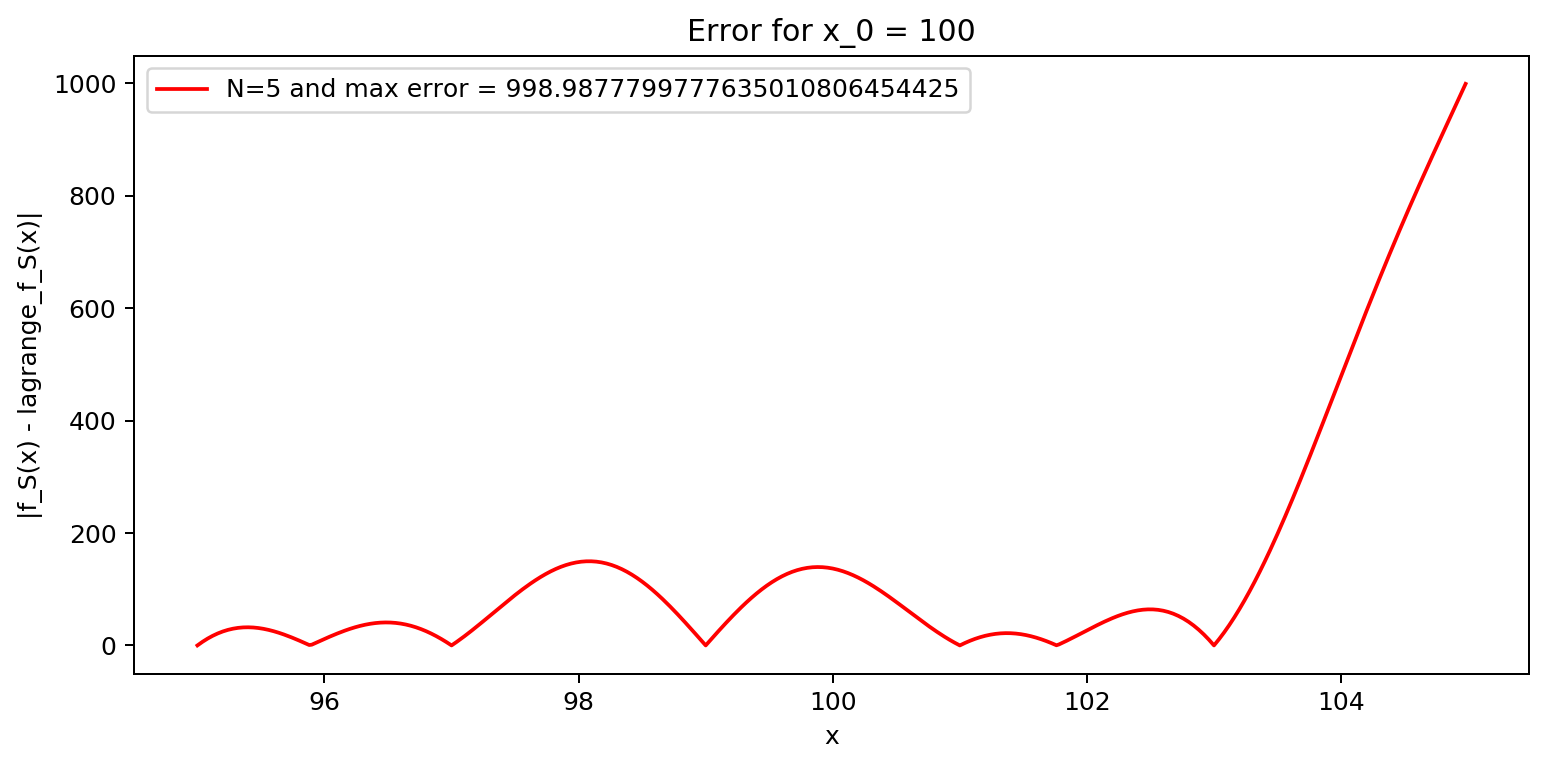

max error = 998.9877799777635010806454425


In [145]:
plt.figure(figsize=(10, 10), dpi=180)
max_error_5 = draw_error(x_0, 5, "red")
plt.legend(("N=5 and max error = " + str(max_error_5), ""))
plt.show()
print("max error = " + str(max_error_5))

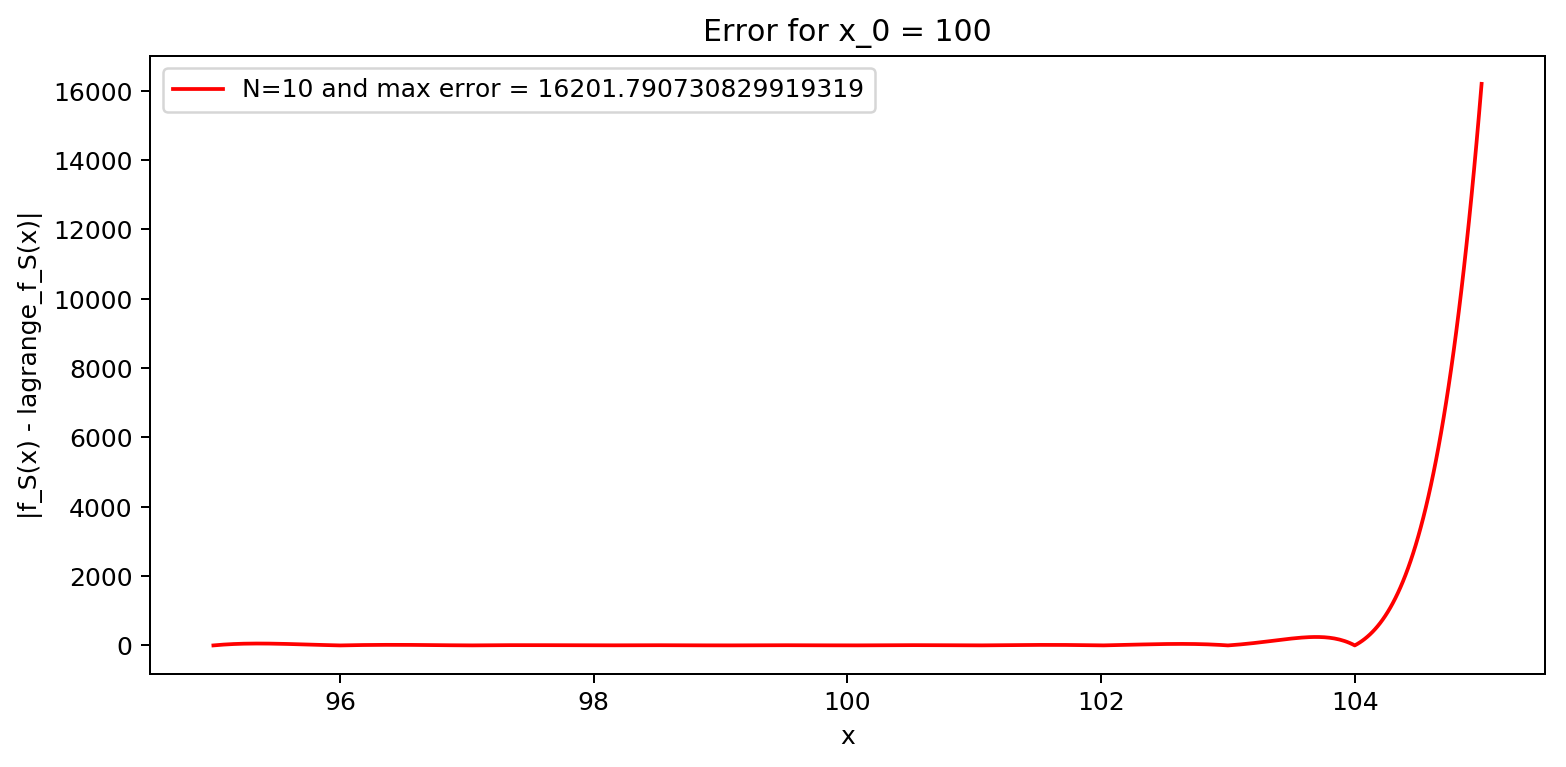

max error = 16201.790730829919319


In [126]:
plt.figure(figsize=(10, 10), dpi=180)
max_error_10 = draw_error(x_0, 10, "red")
plt.legend(("N=10 and max error = " + str(max_error_10), ""))
plt.show()
print("max error = " + str(max_error_10))

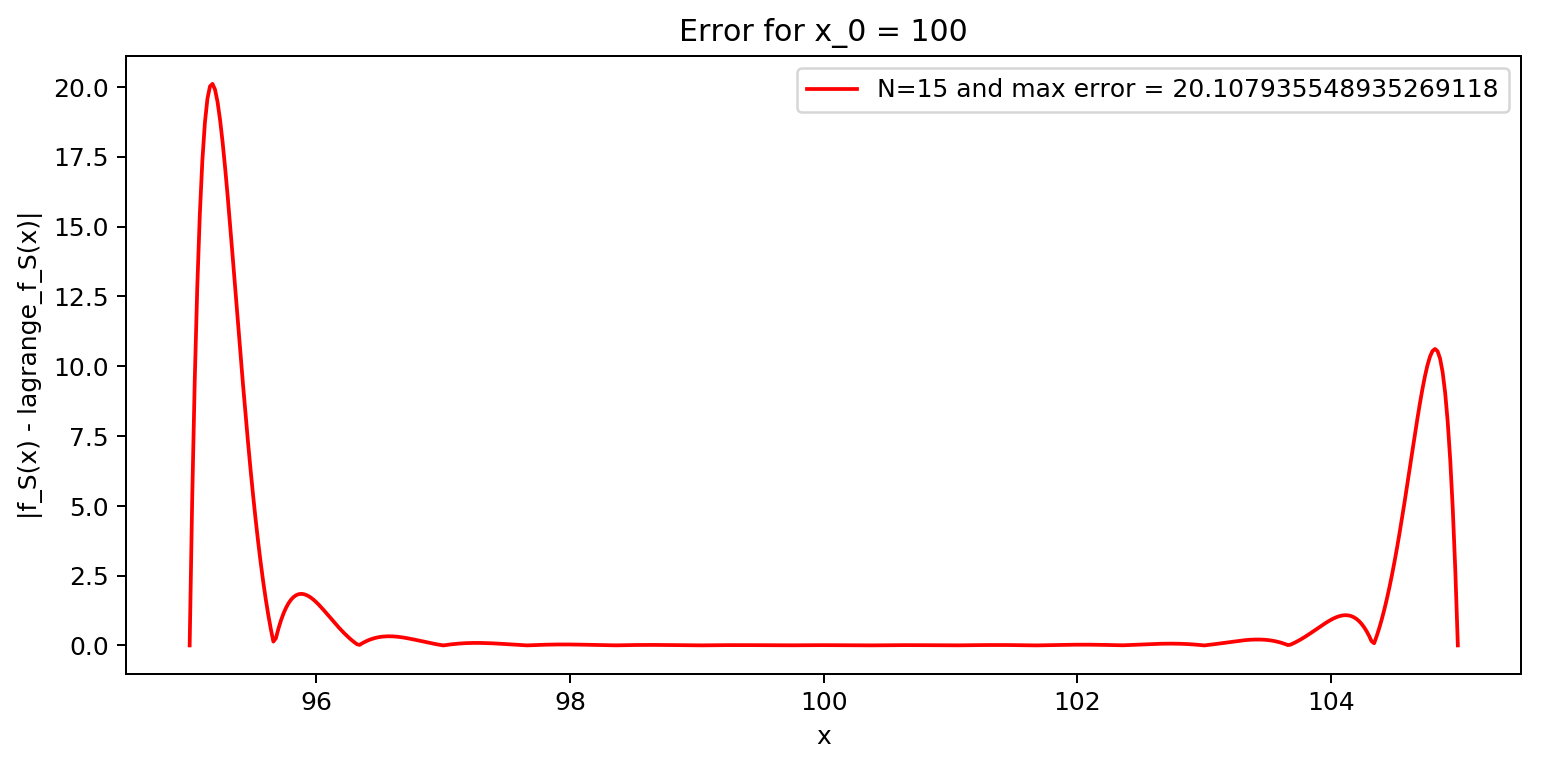

max error = 20.107935548935269118


In [127]:
plt.figure(figsize=(10, 10), dpi=180)
max_error_15 = draw_error(x_0, 15, "red")
plt.legend(("N=15 and max error = " + str(max_error_15), ""))
plt.show()
print("max error = " + str(max_error_15))

Как видим, как и было показано на лекции, ошибка на концах растет сильно быстрее, поэтому в точке 105 мы имеем резкий скачек погрешности.

/home/mikhail/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


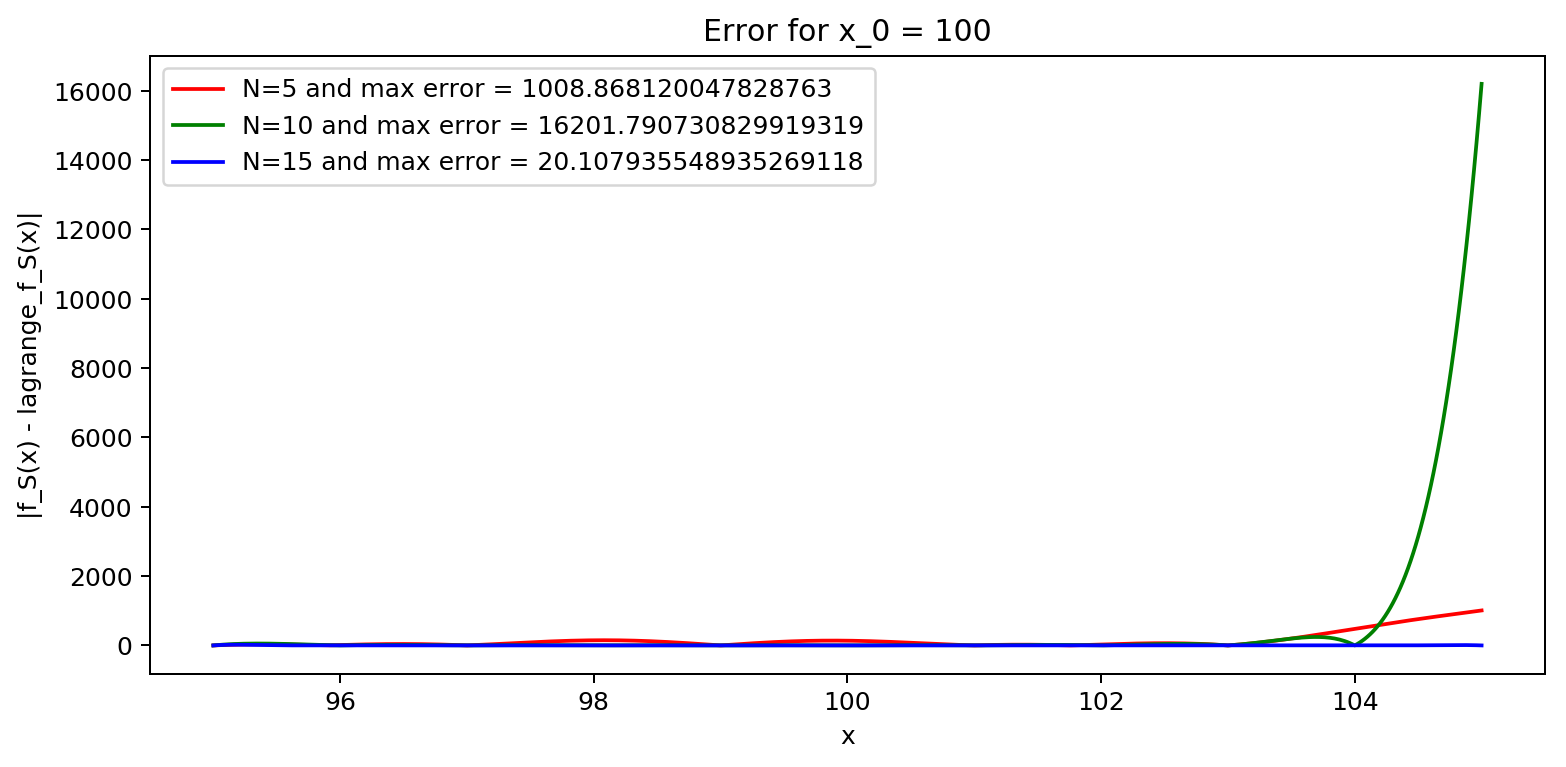

In [128]:
plt.figure(figsize=(10, 10), dpi=180)
max_error_5 = draw_error(x_0, 5, "red")
max_error_10 = draw_error(x_0, 10, "green")
max_error_15 = draw_error(x_0, 15, "blue")
plt.legend(("N=5 and max error = " + str(max_error_5), "N=10 and max error = " + str(max_error_10),
            "N=15 and max error = " + str(max_error_15)))
plt.show()

## Задание 1B

"Построй зависимость максимальной погрешности от N в диапазоне N = 5 - 50"

Для этого используем все, что уже написано, и уберем из draw_error() отрисовку графиков.

In [95]:
def get_max_error(x_0, N):
    lagrange_f_S = get_Lagrange_polinom_for_f_S(x_0, N)
    data_x = []
    data_y = []
    number_of_points = 500
    step = 10 / number_of_points
    left = x_0 - 5
    right = x_0 + 5
    x_cur = left
    max_error = -1
    while x_cur < right:
        error = abs(f_S(x_cur) - lagrange_f_S(x_cur))
        max_error = max(max_error, error)
        x_cur += step
    return max_error

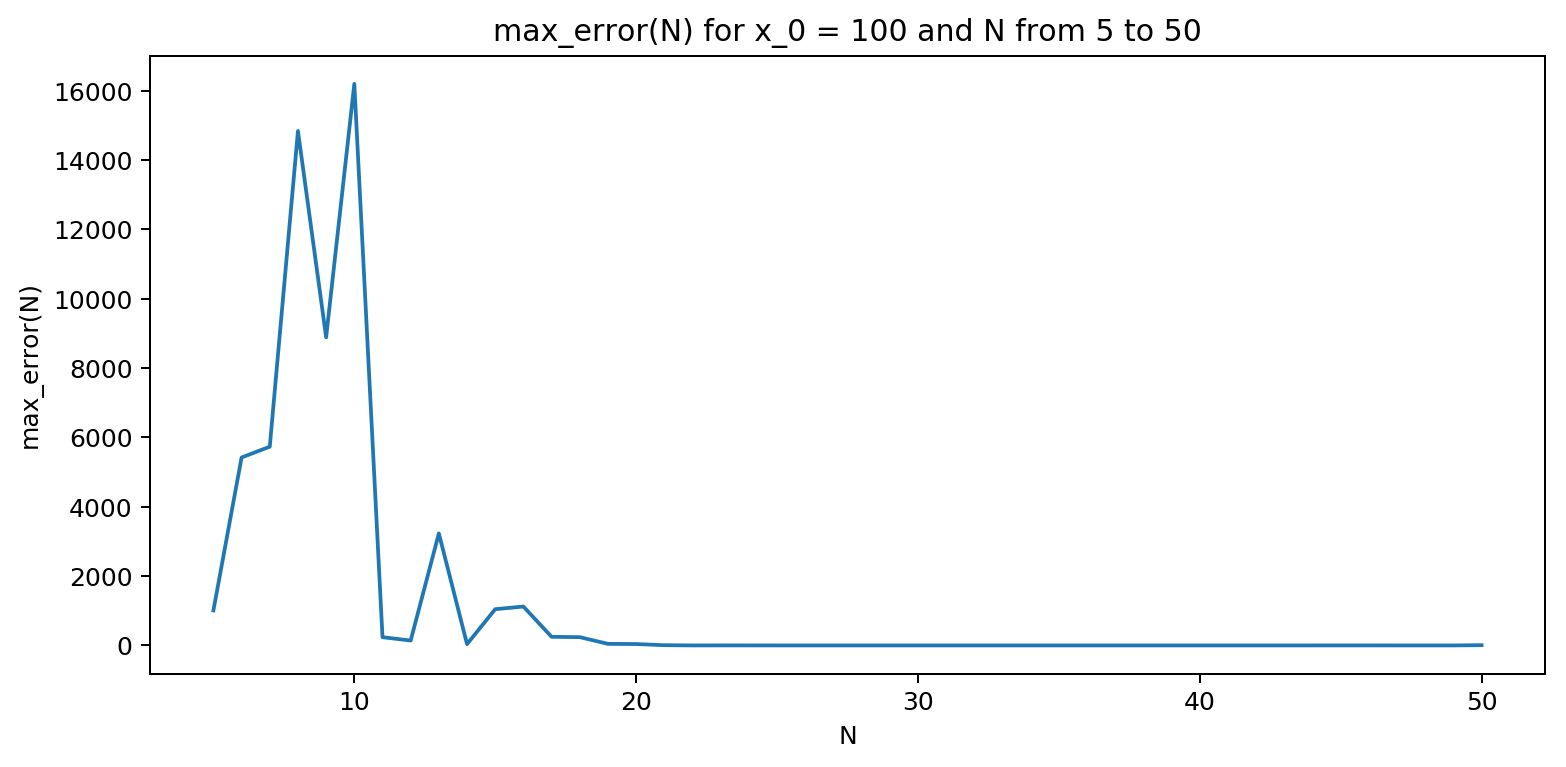

In [96]:
def draw_error_correlation_with_N(x_0, N_min, N_max):
    data_x = []
    data_y = []
    step = 1
    N_cur = N_min
    while N_cur <= N_max:
        data_x.append(N_cur)
        data_y.append(get_max_error(x_0, N_cur))
        N_cur += step
    plt.subplot(211)
    plt.title("max_error(N) for x_0 = " + str(x_0) + " and N from " + str(N_min) + " to " + str(N_max))
    plt.plot(data_x, data_y)
    plt.ylabel("max_error(N)")
    plt.xlabel("N")

plt.figure(figsize=(10, 10), dpi=180)
draw_error_correlation_with_N(x_0, 5, 50)
plt.show()

Тут мы видим, что после N=10 максимальная погрешность начинает убывать и становиться близкой к нулю, а до 10 она достаточно высока. Это хорошо согласуется с оценкой на лекции $|f - p_N| \leq \|f^{N+1}\|_C * 1 / C^k_{N + 1} * h^{N + 1}$. 

Так как мы на паре поняли, что макимум достигается на концах, значит k = N, значит оценка получается $\|f^{N+1}\|_C * 1 / (N + 1) * h^{N + 1}$. 

$h = 10 / N$, поэтому при N больших 10 мы в степень $N + 1$ возводим число меньшее 1, а поэтому можем сильно стремится к нулю, как и происходит в нашем случае.